In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


# **Column Analysis**

In [ ]:
df['Country Name'].describe()

,Country Name
count,11507
unique,256
top,Caribbean small states
freq,57


In [ ]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796390e+11
max,2016.000000,7.904920e+13


# **Analysing Arab Country**

In [ ]:
df_arb = df[df['Country Name'] == 'Arab World']

<Axes: xlabel='YEARS', ylabel='GDP'>

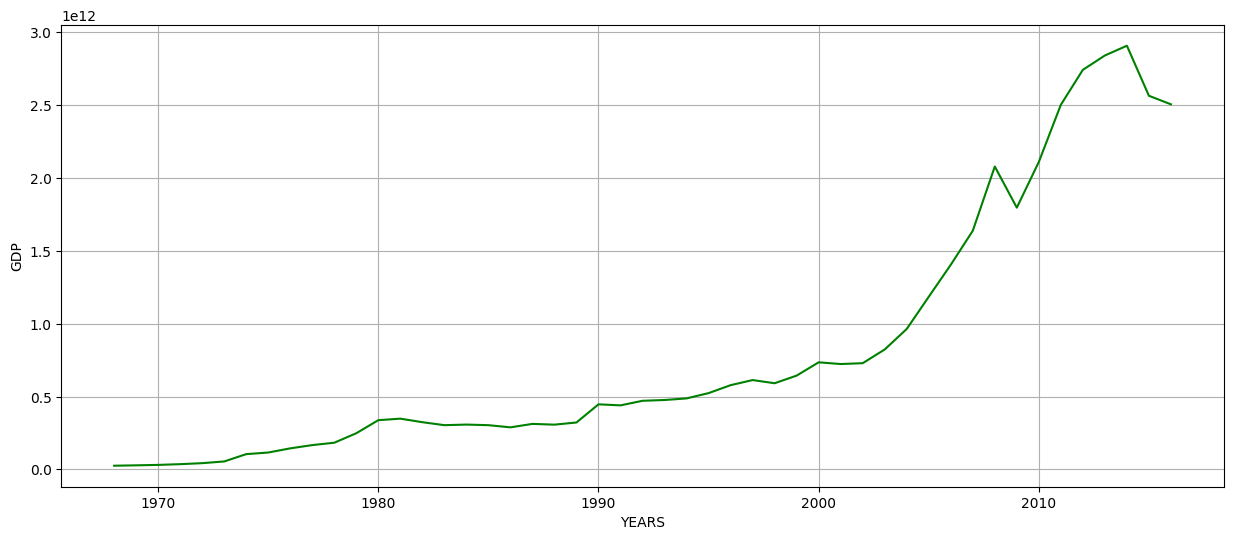

In [ ]:
df_arb.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS',
           color ='green')

In [ ]:
df_arb

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
5,Arab World,ARB,1973,5.501839e+10
6,Arab World,ARB,1974,1.051460e+11
7,Arab World,ARB,1975,1.163370e+11
8,Arab World,ARB,1976,1.448460e+11
9,Arab World,ARB,1977,1.673080e+11


# **GDP Growth Of Each Country**

In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv('gdp.csv')

final_data = []

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
    df = pd.concat(final_data, axis = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'gdp.csv'

In [ ]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968.0,2.576068e+10,0.00
1,Arab World,ARB,1969.0,2.843420e+10,10.38
2,Arab World,ARB,1970.0,3.138550e+10,10.38
3,Arab World,ARB,1971.0,3.642691e+10,16.06
4,Arab World,ARB,1972.0,4.331606e+10,18.91


In [ ]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False)

,Value
Country Name,
Arab World,2.906620e+12


In [ ]:
df.groupby('Country Name').min()['Value'].sort_values(ascending = False)

,Value
Country Name,
Arab World,2.576068e+10


# **GDP Plot Of Each Country**

In [6]:

import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

if not os.path.exists('GDP Individual'):
    os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():
    # Filter out NaN values in 'Country Name'
    if pd.isna(country_name):
        continue

    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)

NameError: name 'df' is not defined

# **GDP For Each Country WRT World**

In [3]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

if not os.path.exists('GDP Individual WRT World'):
    os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():
    # Filter out NaN values in 'Country Name'
    if pd.isna(country_name):
        continue

    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

NameError: name 'df' is not defined

# **GDP of all Countries**

In [ ]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'Countries GDP.html')

'Countries GDP.html'

# **GDP Growth Comparison between Specific Countries**

In [ ]:
def compare_gdp(lst, isOpen):

    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst),
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)


In [ ]:
compare_gdp(['IND','USA','ITA','CHN'], True)

# **GDP Growth Comparies of All the Countries**

In [ ]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'


# **GDP Growth of All Countries Graph Individual**

In [ ]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

if not os.path.exists('GDP Growth Individual'):
    os.mkdir('GDP Growth Individual')

for country_code in df['Country Code'].unique():
    # Filter out NaN values in 'Country Code'
    if pd.isna(country_code):
        continue

    df_pr = df[df['Country Code'] == country_code]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_code)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_code + '.html', auto_open = False)